In [909]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

api_key = 'LOO8PVQCHZUL6QG0'

#Base URL for the Alpha Vantage API
url = 'https://www.alphavantage.co/query'

In [910]:
#XLE

In [911]:
# Parameters for the API request
params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'XLE',
    'outputsize': 'full',
    'datatype': 'csv',
    'apikey': api_key
}

In [912]:
# Make the API request
response = requests.get(url, params=params)


In [913]:
# Load the CSV data into a pandas DataFrame
data = pd.read_csv(StringIO(response.text))


In [914]:
# Convert the 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [915]:
#Define date ranges for pre-COVID and post-COVID periods
pre_covid_start = pd.Timestamp('2017-01-01')
pre_covid_end = pd.Timestamp('2019-12-31')


In [916]:
# Filter data for pre-COVID period only
pre_covid_data_XLE = data[(data['timestamp'] >= pre_covid_start) & (data['timestamp'] <= pre_covid_end)]

In [917]:
# Save the filtered DataFrame to a new CSV file
output_filename = 'XLE_pre_covid_data_2017_2019.csv'
pre_covid_data_XLE.to_csv(output_filename, index=False)
print(f"Data saved to {output_filename}")

Data saved to XLE_pre_covid_data_2017_2019.csv


In [918]:
#Set the 'timestamp' column as the DataFrame index 
pre_covid_data_XLE.set_index('timestamp', inplace=True)


In [919]:
# Print the column names
print(pre_covid_data_XLE.columns)

# Print the first few rows of the DataFrame
print(pre_covid_data_XLE.head())

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
             open   high    low  close    volume
timestamp                                       
2019-12-31  59.40  60.10  59.23  60.04  10722423
2019-12-30  60.12  60.23  59.61  59.70  14629528
2019-12-27  62.17  62.23  61.64  61.68  10718287
2019-12-26  62.23  62.44  61.86  61.94  10156173
2019-12-24  62.13  62.22  61.85  61.96   5037439


In [971]:
#Calculation Returns
#The pre-COVID data to get the last closing price of each month
pre_covid_monthly_data_XLE = pre_covid_data_XLE['close'].resample('M').last()

#Calculate monthly returns: 
#(current month close - previous month close) / previous month close
pre_covid_monthly_returns_XLE = pre_covid_monthly_data_XLE.pct_change() * 100


/var/folders/kx/16xjkcl54kg7d7_x28nq39s00000gn/T/ipykernel_58181/4268386977.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pre_covid_monthly_data_XLE = pre_covid_data_XLE['close'].resample('M').last()


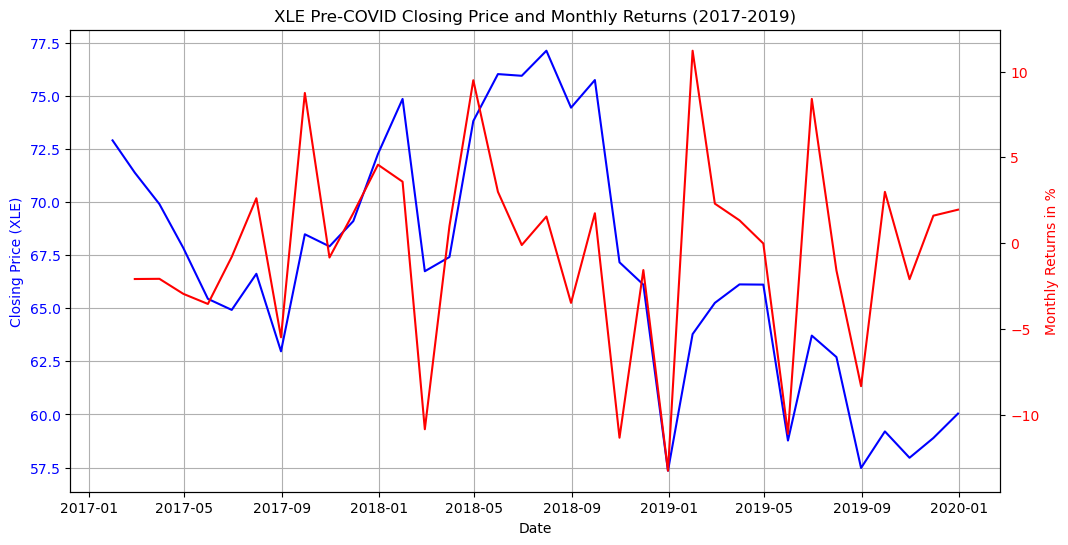

In [921]:
# Plot closing prices and returns on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot closing price on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (XLE)', color='blue')
ax1.plot(pre_covid_monthly_data_XLE.index, pre_covid_monthly_data_XLE, color='blue', label='Closing Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for monthly returns
ax2 = ax1.twinx()  
ax2.set_ylabel('Monthly Returns in %', color='red')  
ax2.plot(pre_covid_monthly_returns_XLE.index, pre_covid_monthly_returns_XLE, color='red', label='Monthly Return')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('XLE Pre-COVID Closing Price and Monthly Returns (2017-2019)')
ax1.grid(True)



Regression Analysis + Plot

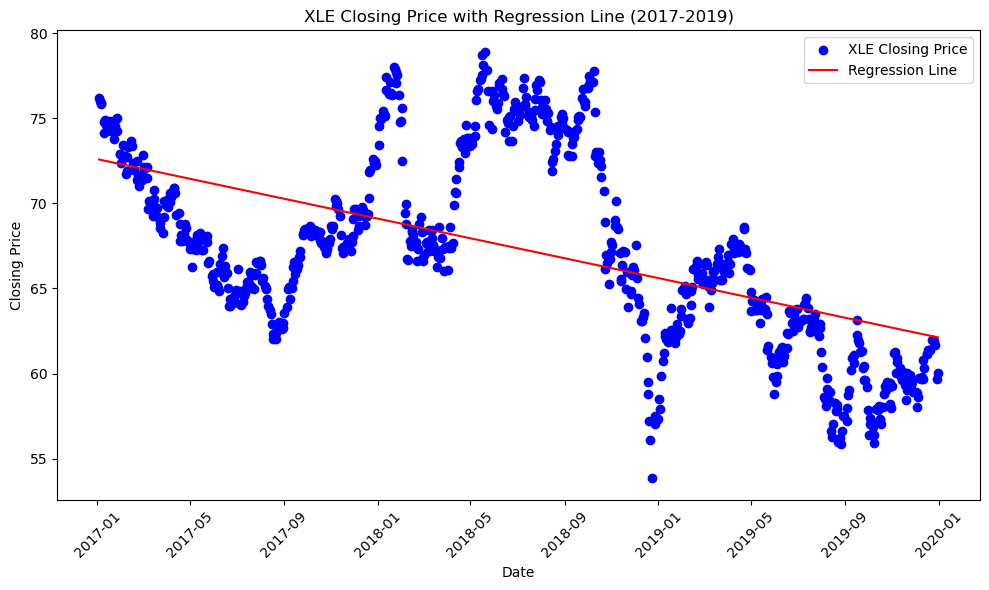

In [922]:
# Filter data for pre-COVID period only
pre_covid_data_XLE = data[(data['timestamp'] >= pre_covid_start) & (data['timestamp'] <= pre_covid_end)]

# Set 'timestamp' as the index
pre_covid_data_XLE.set_index('timestamp', inplace=True)

# Scatter plot: X-axis as the date, Y-axis as the close price
plt.figure(figsize=(10, 6))
plt.scatter(pre_covid_data_XLE.index, pre_covid_data_XLE['close'], color='blue', label='XLE Closing Price')

# Regression Analysis
# Convert the timestamp to ordinal numbers for linear regression
X = pre_covid_data_XLE.index.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = pre_covid_data_XLE['close'].values

# Fit a linear regression using numpy's polyfit (1st degree polynomial)
slope, intercept = np.polyfit(X.flatten(), y, 1)

# Predict the values along the regression line
y_pred = slope * X.flatten() + intercept

# Plot the regression line
plt.plot(pre_covid_data_XLE.index, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('XLE Closing Price with Regression Line (2017-2019)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Tight layout for better display
plt.tight_layout()

# Show the plot
plt.show()

In [923]:
#XLF

In [924]:
api_key = 'LOO8PVQCHZUL6QG0'

In [925]:
# Parameters for the API request (change symbol to XLF)
params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'XLF',
    'outputsize': 'full',
    'datatype': 'csv',
    'apikey': api_key
}

In [926]:
# Make the API request
response = requests.get(url, params=params)

# Print the response text to debug
print(response.text)


timestamp,open,high,low,close,volume
2024-10-22,47.0000,47.2300,46.7800,47.1500,29731385
2024-10-21,47.5400,47.6500,47.1500,47.2400,26207439
2024-10-18,47.6100,47.7200,47.3501,47.6200,34279601
2024-10-17,47.6800,47.8100,47.5800,47.6100,45823445
2024-10-16,47.0800,47.5000,46.9900,47.4800,44973695
2024-10-15,47.1200,47.3900,46.8400,46.9000,42356775
2024-10-14,46.5900,46.8500,46.4600,46.8000,35850836
2024-10-11,45.9200,46.6000,45.8900,46.5100,52850296
2024-10-10,45.8200,45.8600,45.4400,45.6300,34127389
2024-10-09,45.3500,45.8600,45.2600,45.7700,28334270
2024-10-08,45.2600,45.4600,45.1800,45.3500,28762954
2024-10-07,45.6500,45.6700,44.9000,45.0900,26599262
2024-10-04,45.3300,45.6900,45.1500,45.6500,40435851
2024-10-03,44.9600,45.0500,44.6650,44.8900,23545682
2024-10-02,45.0600,45.2300,44.8300,45.1300,37709429
2024-10-01,45.2000,45.3100,44.7750,45.0800,32703005
2024-09-30,45.0400,45.3400,44.8400,45.3200,23599209
2024-09-27,45.1200,45.4370,45.0500,45.1500,23226116
2024-09-26,44.9200,45.1100,

In [927]:
# Load the CSV data into a pandas DataFrame
data = pd.read_csv(StringIO(response.text))

In [928]:
# Convert the 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [929]:
#Define date range for pre-COVID period (2017-01-01 to 2019-12-31)
pre_covid_start = pd.Timestamp('2017-01-01')
pre_covid_end = pd.Timestamp('2019-12-31')

In [930]:
# Filter data for the pre-COVID period only
pre_covid_data_XLF = data[(data['timestamp'] >= pre_covid_start) & (data['timestamp'] <= pre_covid_end)]

# Set the 'timestamp' column as the DataFrame index
pre_covid_data_XLF.set_index('timestamp', inplace=True)

In [931]:
# Save the pre-COVID data to a CSV file using the requested format
output_filename = 'XLF_pre_covid_data_2017_2019.csv'
pre_covid_data_XLF.to_csv(output_filename, index=False)

output_filename

'XLF_pre_covid_data_2017_2019.csv'

In [932]:
# Print the column names
print(pre_covid_data_XLF.columns)

# Print the first few rows of the DataFrame
print(pre_covid_data_XLF.head())

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
             open   high    low  close    volume
timestamp                                       
2019-12-31  30.66  30.79  30.62  30.78  15787838
2019-12-30  30.91  30.96  30.65  30.68  18814495
2019-12-27  30.90  30.91  30.75  30.77  19417420
2019-12-26  30.71  30.85  30.71  30.85  15891268
2019-12-24  30.67  30.69  30.60  30.68  12315909


In [933]:
#Calculation Returns
#The pre-COVID data to get the last closing price of each month
pre_covid_monthly_data_XLF = pre_covid_data_XLF['close'].resample('M').last()

#Calculate monthly returns: (current month close - previous month close) / previous month close
pre_covid_monthly_returns_XLF = pre_covid_monthly_data_XLF.pct_change() * 100

/var/folders/kx/16xjkcl54kg7d7_x28nq39s00000gn/T/ipykernel_58181/827027409.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pre_covid_monthly_data_XLF = pre_covid_data_XLF['close'].resample('M').last()


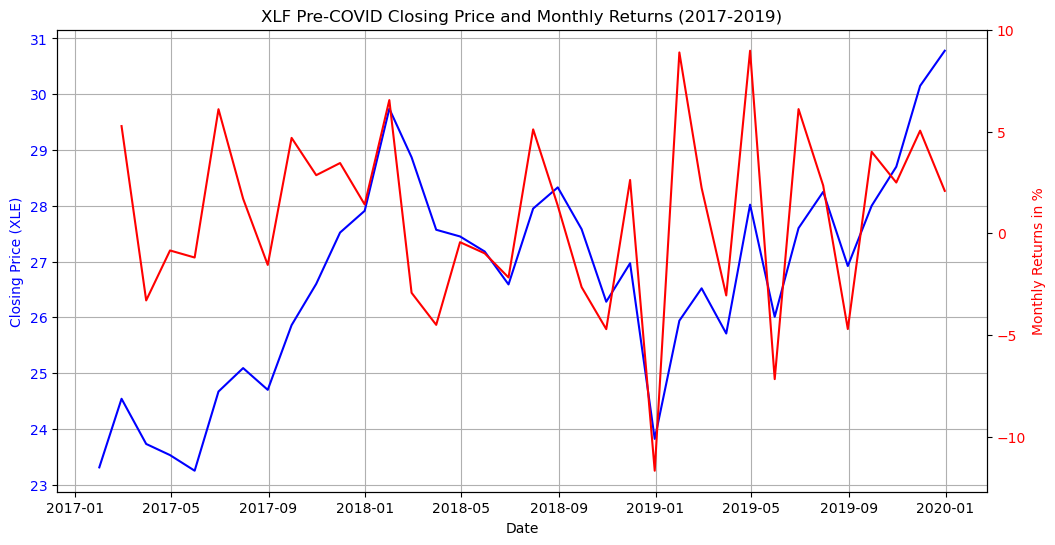

In [934]:
# Plot closing prices and returns on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot closing price on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (XLF)', color='blue')
ax1.plot(pre_covid_monthly_data_XLF.index, pre_covid_monthly_data_XLF, color='blue', label='Closing Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for monthly returns
ax2 = ax1.twinx()  
ax2.set_ylabel('Monthly Returns in %', color='red')  
ax2.plot(pre_covid_monthly_returns_XLF.index, pre_covid_monthly_returns_XLF, color='red', label='Monthly Return')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('XLF Pre-COVID Closing Price and Monthly Returns (2017-2019)')
ax1.grid(True)

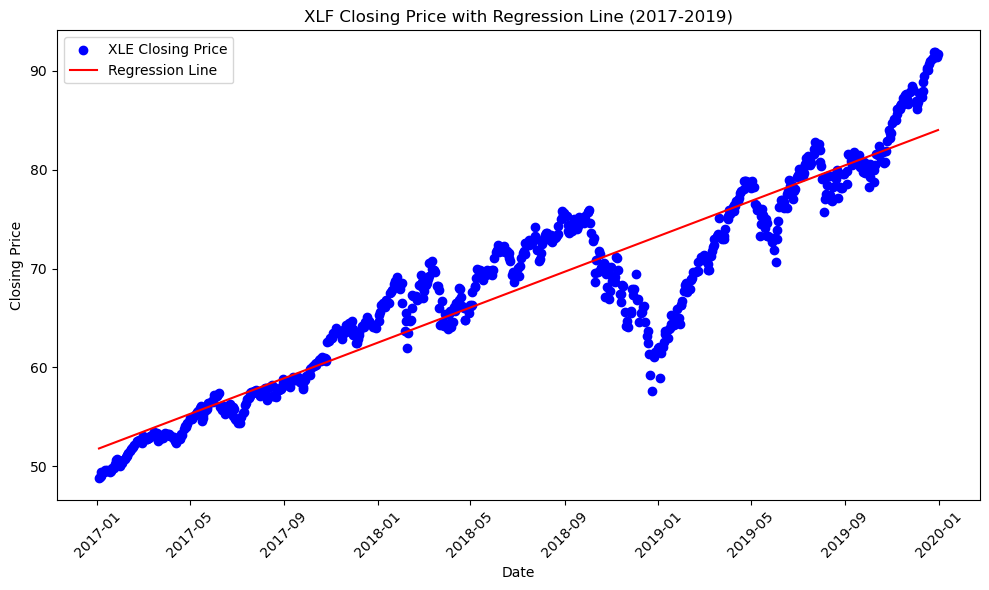

In [970]:
# Filter data for pre-COVID period only
pre_covid_data_XLF = data[(data['timestamp'] >= pre_covid_start) & (data['timestamp'] <= pre_covid_end)]

# Set 'timestamp' as the index
pre_covid_data_XLF.set_index('timestamp', inplace=True)

# Scatter plot: X-axis as the date, Y-axis as the close price
plt.figure(figsize=(10, 6))
plt.scatter(pre_covid_data_XLF.index, pre_covid_data_XLF['close'], color='blue', label='XLE Closing Price')

# Regression Analysis
# Convert the timestamp to ordinal numbers for linear regression
X = pre_covid_data_XLF.index.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = pre_covid_data_XLF['close'].values

# Fit a linear regression using numpy's polyfit (1st degree polynomial)
slope, intercept = np.polyfit(X.flatten(), y, 1)

# Predict the values along the regression line
y_pred = slope * X.flatten() + intercept

# Plot the regression line
plt.plot(pre_covid_data_XLF.index, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('XLF Closing Price with Regression Line (2017-2019)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Tight layout for better display
plt.tight_layout()

# Show the plot
plt.show()

In [935]:
#XLV 

In [936]:
api_key = 'LOO8PVQCHZUL6QG0'

In [937]:
# Parameters for the API request (change symbol to XLF)
params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'XLV',
    'outputsize': 'full',
    'datatype': 'csv',
    'apikey': api_key
}

In [938]:
# Make the API request
response = requests.get(url, params=params)

# Print the response text to debug
print(response.text)


timestamp,open,high,low,close,volume
2024-10-22,150.5300,151.3900,150.4000,151.1100,5164863
2024-10-21,152.7300,153.1400,151.1800,151.3300,4825870
2024-10-18,152.5000,153.4950,152.0600,153.1300,9823968
2024-10-17,152.7700,153.0200,152.2900,152.3900,5430044
2024-10-16,152.6500,153.6059,152.2400,153.2800,4510189
2024-10-15,152.6700,154.5850,152.5100,152.8500,9088576
2024-10-14,154.0600,155.0150,153.5300,154.7400,4819781
2024-10-11,153.2500,154.0700,153.0300,153.8900,9354102
2024-10-10,153.3400,153.4600,152.3950,152.7700,4385633
2024-10-09,151.9300,153.4600,151.5700,153.3400,7840031
2024-10-08,151.3700,152.0300,151.2400,151.7900,4726590
2024-10-07,151.6500,152.1100,150.6850,150.9700,5922859
2024-10-04,151.7500,152.0200,150.8800,151.6400,6591450
2024-10-03,152.5200,152.6600,151.2400,151.5200,5550985
2024-10-02,153.0200,153.3800,151.8700,152.9000,7158480
2024-10-01,154.1400,154.3550,152.6300,153.2100,10560380
2024-09-30,152.8100,154.0600,152.5800,154.0200,7235028
2024-09-27,153.3000,154.200

In [939]:
# Load the CSV data into a pandas DataFrame
data = pd.read_csv(StringIO(response.text))

In [940]:
# Convert the 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [941]:
#Define date range for pre-COVID period (2017-01-01 to 2019-12-31)
pre_covid_start = pd.Timestamp('2017-01-01')
pre_covid_end = pd.Timestamp('2019-12-31')

In [942]:
# Filter data for the pre-COVID period only
pre_covid_data_XLV = data[(data['timestamp'] >= pre_covid_start) & (data['timestamp'] <= pre_covid_end)]

# Set the 'timestamp' column as the DataFrame index
pre_covid_data_XLV.set_index('timestamp', inplace=True)

In [943]:
# Save the pre-COVID data to a CSV file using the requested format
output_filename = 'XLV_pre_covid_data_2017_2019.csv'
pre_covid_data_XLV.to_csv(output_filename, index=False)

output_filename

'XLV_pre_covid_data_2017_2019.csv'

In [944]:
# Print the column names
print(pre_covid_data_XLV.columns)

# Print the first few rows of the DataFrame
print(pre_covid_data_XLV.head())

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
              open    high     low   close   volume
timestamp                                          
2019-12-31  101.44  101.95  101.27  101.86  4746745
2019-12-30  102.27  102.49  101.51  101.66  5665146
2019-12-27  103.13  103.14  102.71  102.94  3605004
2019-12-26  103.11  103.23  102.58  102.91  2910075
2019-12-24  103.11  103.24  102.73  102.98  2071790


In [945]:
#Calculation Returns
#The pre-COVID data to get the last closing price of each month
pre_covid_monthly_data_XLV = pre_covid_data_XLV['close'].resample('M').last()

#Calculate monthly returns: (current month close - previous month close) / previous month close
pre_covid_monthly_returns_XLV = pre_covid_monthly_data_XLV.pct_change() * 100


/var/folders/kx/16xjkcl54kg7d7_x28nq39s00000gn/T/ipykernel_58181/4135728722.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pre_covid_monthly_data_XLV = pre_covid_data_XLV['close'].resample('M').last()


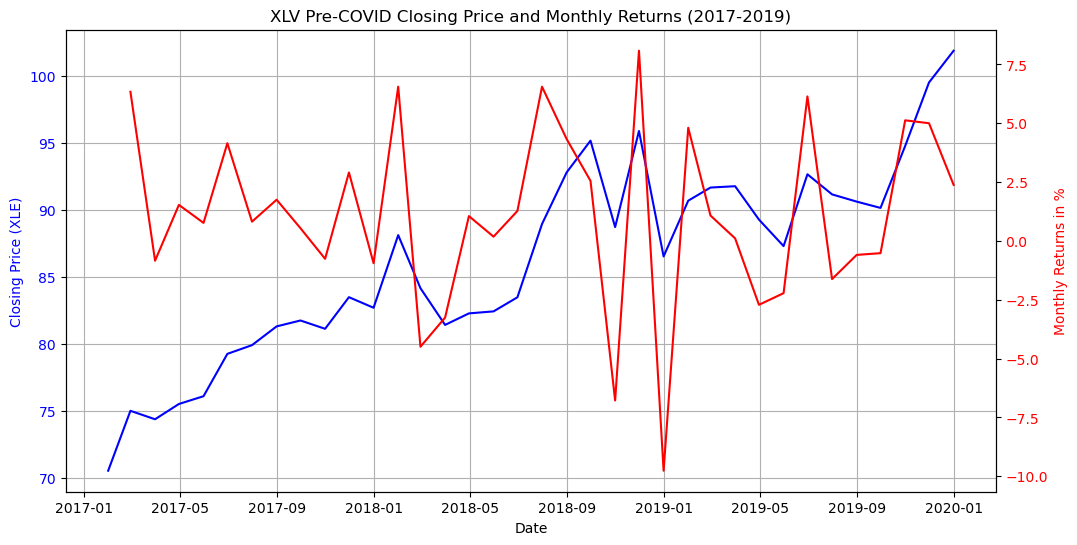

In [946]:
# Plot closing prices and returns on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot closing price on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (XLV)', color='blue')
ax1.plot(pre_covid_monthly_data_XLV.index, pre_covid_monthly_data_XLV, color='blue', label='Closing Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for monthly returns
ax2 = ax1.twinx()  
ax2.set_ylabel('Monthly Returns in %', color='red')  
ax2.plot(pre_covid_monthly_returns_XLV.index, pre_covid_monthly_returns_XLV, color='red', label='Monthly Return')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('XLV Pre-COVID Closing Price and Monthly Returns (2017-2019)')
ax1.grid(True)

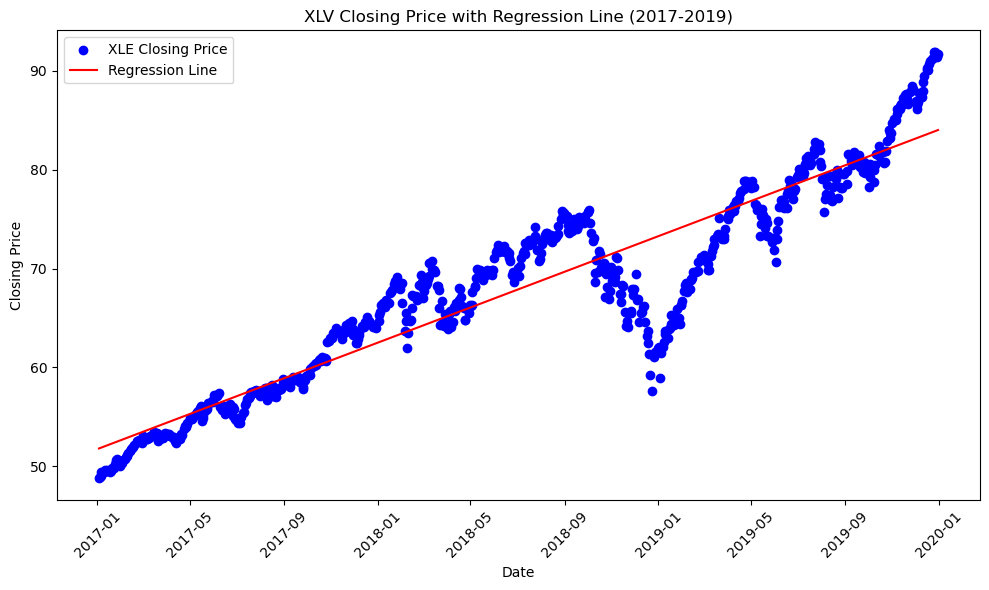

In [968]:
# Filter data for pre-COVID period only
pre_covid_data_XLV = data[(data['timestamp'] >= pre_covid_start) & (data['timestamp'] <= pre_covid_end)]

# Set 'timestamp' as the index
pre_covid_data_XLV.set_index('timestamp', inplace=True)

# Scatter plot: X-axis as the date, Y-axis as the close price
plt.figure(figsize=(10, 6))
plt.scatter(pre_covid_data_XLV.index, pre_covid_data_XLV['close'], color='blue', label='XLE Closing Price')

# Regression Analysis
# Convert the timestamp to ordinal numbers for linear regression
X = pre_covid_data_XLV.index.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = pre_covid_data_XLV['close'].values

# Fit a linear regression using numpy's polyfit (1st degree polynomial)
slope, intercept = np.polyfit(X.flatten(), y, 1)

# Predict the values along the regression line
y_pred = slope * X.flatten() + intercept

# Plot the regression line
plt.plot(pre_covid_data_XLV.index, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('XLV Closing Price with Regression Line (2017-2019)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Tight layout for better display
plt.tight_layout()

# Show the plot
plt.show()

In [947]:
#XLK

In [948]:
api_key = 'LOO8PVQCHZUL6QG0'

In [949]:
# Parameters for the API request (change symbol to XLF)
params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'XLK',
    'outputsize': 'full',
    'datatype': 'csv',
    'apikey': api_key
}

In [950]:
# Make the API request
response = requests.get(url, params=params)

# Print the response text to debug
print(response.text)


timestamp,open,high,low,close,volume
2024-10-22,230.7600,232.5400,230.1000,231.7500,3077938
2024-10-21,230.1900,232.0200,229.7700,231.9900,3161192
2024-10-18,231.2900,231.7600,230.4200,230.9100,2268528
2024-10-17,232.5900,232.7200,230.0900,230.0900,3025591
2024-10-16,229.4000,229.7400,226.9238,229.3900,2879422
2024-10-15,234.0000,234.5650,227.8300,228.6800,7089654
2024-10-14,232.2800,234.3000,232.1710,233.8200,4905062
2024-10-11,229.8600,231.3300,229.5200,230.8100,4424457
2024-10-10,228.9300,231.0050,228.2900,230.4100,2846118
2024-10-09,228.1000,230.7900,227.3900,230.4700,3789891
2024-10-08,225.3500,228.3000,224.8350,227.9200,3932395
2024-10-07,224.2800,225.7700,223.1800,223.7400,2215206
2024-10-04,225.6900,225.8500,222.9200,225.2900,2507672
2024-10-03,221.2400,224.4400,221.2100,222.8100,2892440
2024-10-02,220.3100,222.8950,219.0600,221.8900,2266152
2024-10-01,225.0900,225.2200,218.9500,220.2600,5647652
2024-09-30,224.1200,225.9000,223.0000,225.7600,2750944
2024-09-27,227.5400,227.6100

In [951]:
# Load the CSV data into a pandas DataFrame
data = pd.read_csv(StringIO(response.text))

In [952]:
# Convert the 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [953]:
#Define date range for pre-COVID period (2017-01-01 to 2019-12-31)
pre_covid_start = pd.Timestamp('2017-01-01')
pre_covid_end = pd.Timestamp('2019-12-31')

In [954]:
# Filter data for the pre-COVID period only
pre_covid_data_XLK = data[(data['timestamp'] >= pre_covid_start) & (data['timestamp'] <= pre_covid_end)]

# Set the 'timestamp' column as the DataFrame index
pre_covid_data_XLK.set_index('timestamp', inplace=True)

In [955]:
# Save the pre-COVID data to a CSV file using the requested format
output_filename = 'XLK_pre_covid_data_2017_2019.csv'
pre_covid_data_XLK.to_csv(output_filename, index=False)

output_filename

'XLK_pre_covid_data_2017_2019.csv'

In [956]:
# Print the column names
print(pre_covid_data_XLK.columns)

# Print the first few rows of the DataFrame
print(pre_covid_data_XLK.head())

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
             open   high    low  close   volume
timestamp                                      
2019-12-31  91.07  91.77  90.95  91.67  5800856
2019-12-30  91.89  91.90  90.68  91.38  8245519
2019-12-27  92.29  92.29  91.68  91.91  9666092
2019-12-26  91.43  91.94  91.37  91.92  4134648
2019-12-24  91.37  91.37  91.03  91.24  2445364


In [957]:
#Calculation Returns
#The pre-COVID data to get the last closing price of each month
pre_covid_monthly_data_XLK = pre_covid_data_XLK['close'].resample('M').last()

#Calculate monthly returns: (current month close - previous month close) / previous month close
pre_covid_monthly_returns_XLK = pre_covid_monthly_data_XLK.pct_change() * 100

/var/folders/kx/16xjkcl54kg7d7_x28nq39s00000gn/T/ipykernel_58181/2868763.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pre_covid_monthly_data_XLK = pre_covid_data_XLK['close'].resample('M').last()


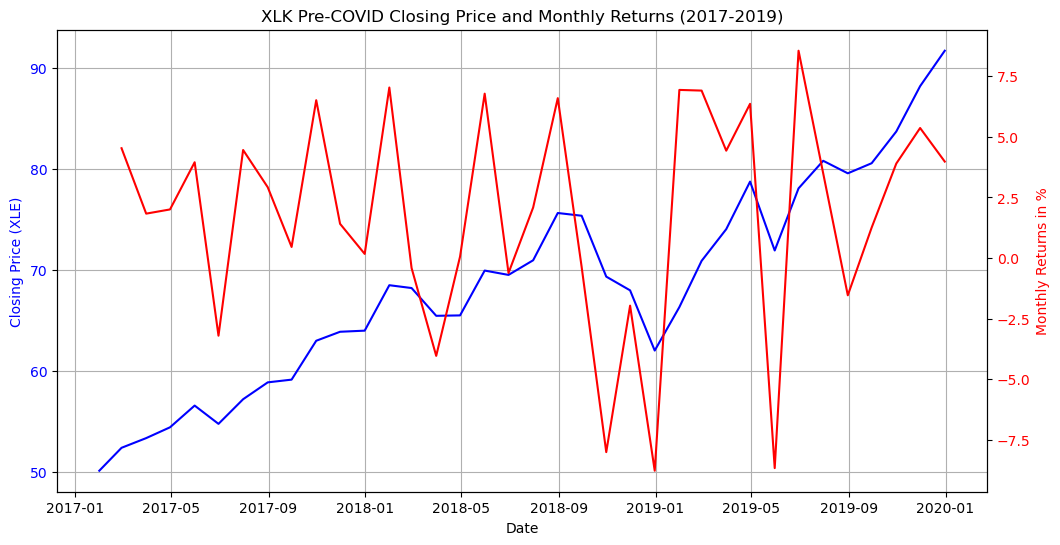

In [958]:
# Plot closing prices and returns on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot closing price on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (XLK)', color='blue')
ax1.plot(pre_covid_monthly_data_XLK.index, pre_covid_monthly_data_XLK, color='blue', label='Closing Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for monthly returns
ax2 = ax1.twinx()  
ax2.set_ylabel('Monthly Returns in %', color='red')  
ax2.plot(pre_covid_monthly_returns_XLK.index, pre_covid_monthly_returns_XLK, color='red', label='Monthly Return')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('XLK Pre-COVID Closing Price and Monthly Returns (2017-2019)')
ax1.grid(True)

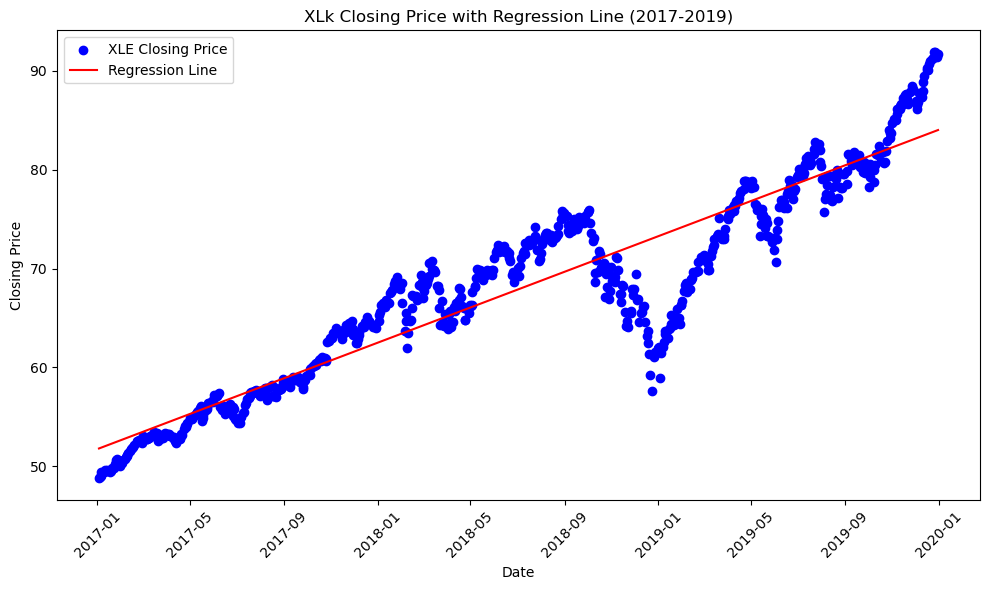

In [969]:
# Filter data for pre-COVID period only
pre_covid_data_XLK = data[(data['timestamp'] >= pre_covid_start) & (data['timestamp'] <= pre_covid_end)]

# Set 'timestamp' as the index
pre_covid_data_XLK.set_index('timestamp', inplace=True)

# Scatter plot: X-axis as the date, Y-axis as the close price
plt.figure(figsize=(10, 6))
plt.scatter(pre_covid_data_XLK.index, pre_covid_data_XLK['close'], color='blue', label='XLE Closing Price')

# Regression Analysis
# Convert the timestamp to ordinal numbers for linear regression
X = pre_covid_data_XLK.index.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = pre_covid_data_XLK['close'].values

# Fit a linear regression using numpy's polyfit (1st degree polynomial)
slope, intercept = np.polyfit(X.flatten(), y, 1)

# Predict the values along the regression line
y_pred = slope * X.flatten() + intercept

# Plot the regression line
plt.plot(pre_covid_data_XLK.index, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('XLk Closing Price with Regression Line (2017-2019)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Tight layout for better display
plt.tight_layout()

# Show the plot
plt.show()

In [959]:
# Compiling the Grpahs ( Closing Price)

In [960]:
# Function to get data for a specific ETF symbol
def get_etf_data(symbol):
    url = 'https://www.alphavantage.co/query'
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'outputsize': 'full',
        'datatype': 'csv',
        'apikey': api_key
    }

    response = requests.get(url, params=params)
    data = pd.read_csv(StringIO(response.text))
    
    # Convert the 'timestamp' column to datetime
    data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')
    
    return data

# Fetch data for XLE, XLV, XLF, and XLK
xle_data = get_etf_data('XLE')
xlv_data = get_etf_data('XLV')
xlf_data = get_etf_data('XLF')
xlk_data = get_etf_data('XLK')

In [961]:
# Define date range for pre-COVID period (2017-01-01 to 2019-12-31)
pre_covid_start = pd.Timestamp('2017-01-01')
pre_covid_end = pd.Timestamp('2019-12-31')

# Filter data for the pre-COVID period for each ETF
xle_pre_covid = xle_data[(xle_data['timestamp'] >= pre_covid_start) & (xle_data['timestamp'] <= pre_covid_end)]
xlv_pre_covid = xlv_data[(xlv_data['timestamp'] >= pre_covid_start) & (xlv_data['timestamp'] <= pre_covid_end)]
xlf_pre_covid = xlf_data[(xlf_data['timestamp'] >= pre_covid_start) & (xlf_data['timestamp'] <= pre_covid_end)]
xlk_pre_covid = xlk_data[(xlk_data['timestamp'] >= pre_covid_start) & (xlk_data['timestamp'] <= pre_covid_end)]

# Set the 'timestamp' column as the index for better plotting
xle_pre_covid.set_index('timestamp', inplace=True)
xlv_pre_covid.set_index('timestamp', inplace=True)
xlf_pre_covid.set_index('timestamp', inplace=True)
xlk_pre_covid.set_index('timestamp', inplace=True)

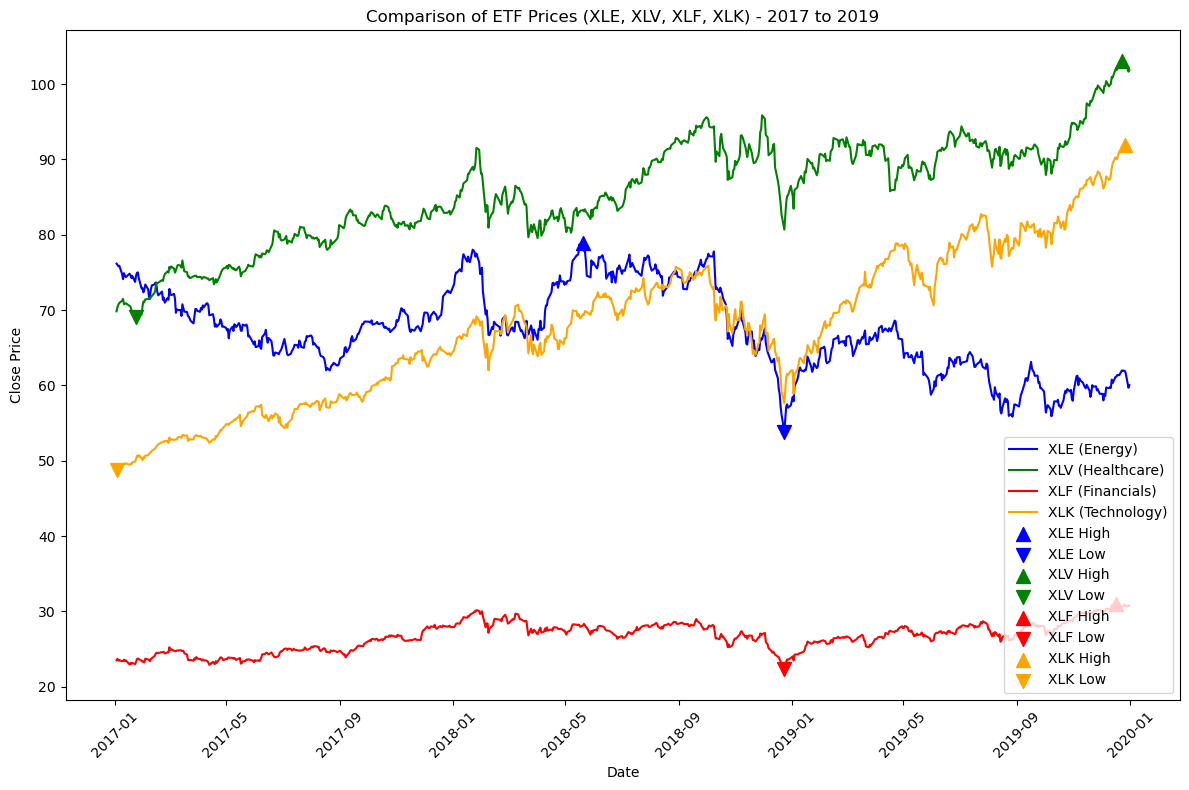

In [962]:
import matplotlib.pyplot as plt

# Find high and low points for each ETF
xle_high = xle_pre_covid['close'].idxmax(), xle_pre_covid['close'].max()  
xle_low = xle_pre_covid['close'].idxmin(), xle_pre_covid['close'].min()

xlv_high = xlv_pre_covid['close'].idxmax(), xlv_pre_covid['close'].max()
xlv_low = xlv_pre_covid['close'].idxmin(), xlv_pre_covid['close'].min()

xlf_high = xlf_pre_covid['close'].idxmax(), xlf_pre_covid['close'].max()
xlf_low = xlf_pre_covid['close'].idxmin(), xlf_pre_covid['close'].min()

xlk_high = xlk_pre_covid['close'].idxmax(), xlk_pre_covid['close'].max()
xlk_low = xlk_pre_covid['close'].idxmin(), xlk_pre_covid['close'].min()

# Create a new figure for the plot
plt.figure(figsize=(12, 8))

# Plot the 'close' prices for each ETF
plt.plot(xle_pre_covid.index, xle_pre_covid['close'], label='XLE (Energy)', color='blue')
plt.plot(xlv_pre_covid.index, xlv_pre_covid['close'], label='XLV (Healthcare)', color='green')
plt.plot(xlf_pre_covid.index, xlf_pre_covid['close'], label='XLF (Financials)', color='red')
plt.plot(xlk_pre_covid.index, xlk_pre_covid['close'], label='XLK (Technology)', color='orange')

# Add high and low markers for XLE
plt.scatter(xle_high[0], xle_high[1], color='blue', marker='^', s=100, label='XLE High')
plt.scatter(xle_low[0], xle_low[1], color='blue', marker='v', s=100, label='XLE Low')

# Add high and low markers for XLV
plt.scatter(xlv_high[0], xlv_high[1], color='green', marker='^', s=100, label='XLV High')
plt.scatter(xlv_low[0], xlv_low[1], color='green', marker='v', s=100, label='XLV Low')

# Add high and low markers for XLF
plt.scatter(xlf_high[0], xlf_high[1], color='red', marker='^', s=100, label='XLF High')
plt.scatter(xlf_low[0], xlf_low[1], color='red', marker='v', s=100, label='XLF Low')

# Add high and low markers for XLK
plt.scatter(xlk_high[0], xlk_high[1], color='orange', marker='^', s=100, label='XLK High')
plt.scatter(xlk_low[0], xlk_low[1], color='orange', marker='v', s=100, label='XLK Low')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Comparison of ETF Prices (XLE, XLV, XLF, XLK) - 2017 to 2019')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()